In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Read and save dataset as a dataframe:
df = pd.read_csv('human_body_temperature.csv')

# Inspect the columns of the dataframe:
df.info()

# Inspect the values of the dataframe:
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.2+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
# xheck NULL count for each column in the dataframe:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

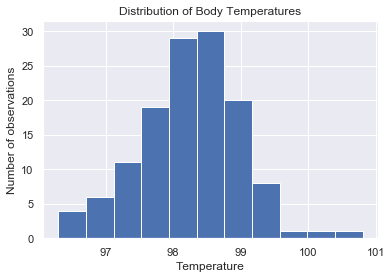

In [7]:
sns.set()
n_bins = int(np.sqrt(len(df['temperature'])))
#_ = plt.hist(df['temperature'])
_ = plt.hist(df['temperature'], bins=n_bins)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Number of observations')
_ = plt.title('Distribution of Body Temperatures')
plt.show()

In [8]:
temp = np.array(df['temperature'])
n = len(temp)

#Computing the mean and standard deviation of the data
temp_mean = np.mean(temp)
temp_std = np.std(temp)

#Display the statistics for sample data:
print('Sample size =', n)
print('Mean =', temp_mean)
print('Standard deviation =', temp_std)

Sample size = 130
Mean = 98.24923076923075
Standard deviation = 0.730357778905038


In [9]:
# Seed the random number generator:
np.random.seed(42)


# Simulate a random sample with the computed statistics and size of 10,000:
normal = np.random.normal(temp_mean, temp_std, 10000)
normal

array([98.61200981, 98.14824836, 98.72227513, ..., 97.73409721,
       98.61131701, 98.71986489])

In [10]:
# Define of function to compute the CDF:

def ecdf(data):
    """Compute CDF for a 1-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

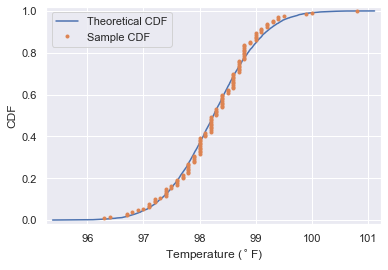

In [11]:
# Compute ECDFs:
x_temp, y_temp = ecdf(temp)
x_theor, y_theor = ecdf(normal)

# Plot both CDFs on the same plot:
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label axes and add legend and a title:
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('Theoretical CDF', 'Sample CDF'), loc='upper left')
#_ = plt.title('ECDF Confirming the Normal Distribution of Body Temperatures', color='green')

#Display the plots:
plt.margins(0.02)
plt.show()

In [12]:
# Compute results of a one sample t-test:
t = stats.ttest_1samp(temp, 98.6)[0]
p = stats.ttest_1samp(temp, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [13]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.3675464541818454 3.367546454181878


In [14]:
# Compute standard error of the mean:
sem = temp_std/np.sqrt(n)

In [15]:
# Calculate and save z-statistic:
z = (temp_mean - 98.6) / sem

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.4759252020785585
p-value: 4.3523151658713056e-08
